Artists picked: Piet Hein Eek, Kazimir Malevich, Eleanor Vere Boyle, Claude Cahun, Alain Laboile, Go Nagai
Piet Hein Eek [269047]


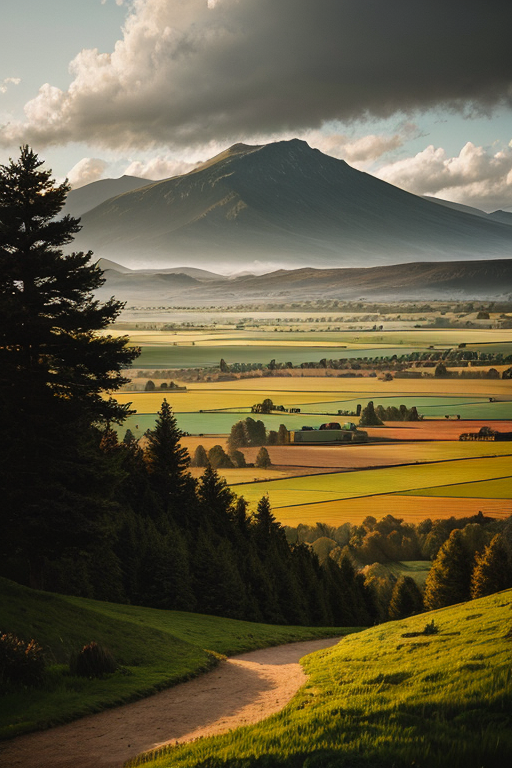

Kazimir Malevich [269047]


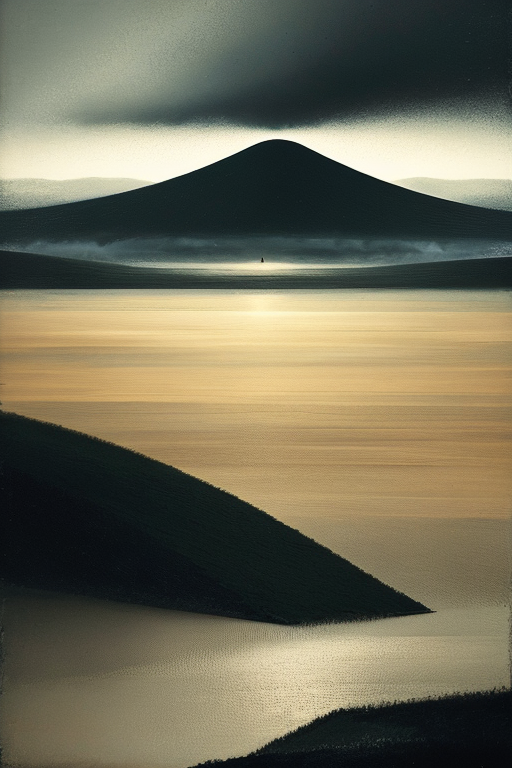

Eleanor Vere Boyle [269047]


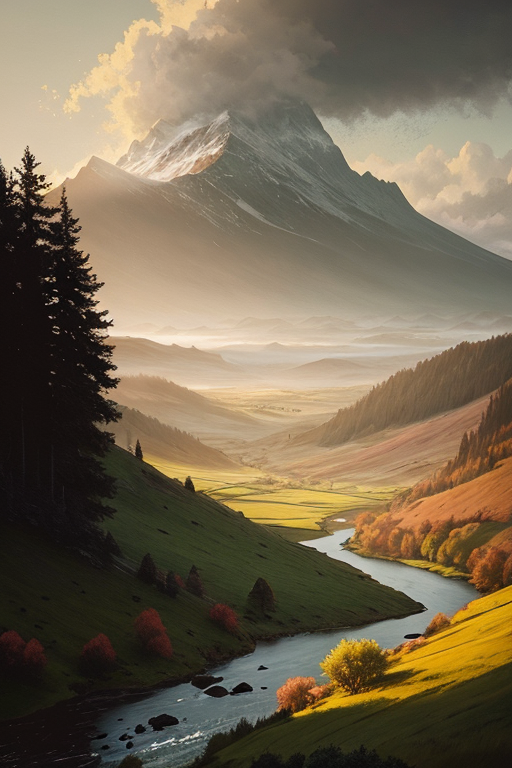

Claude Cahun [269047]


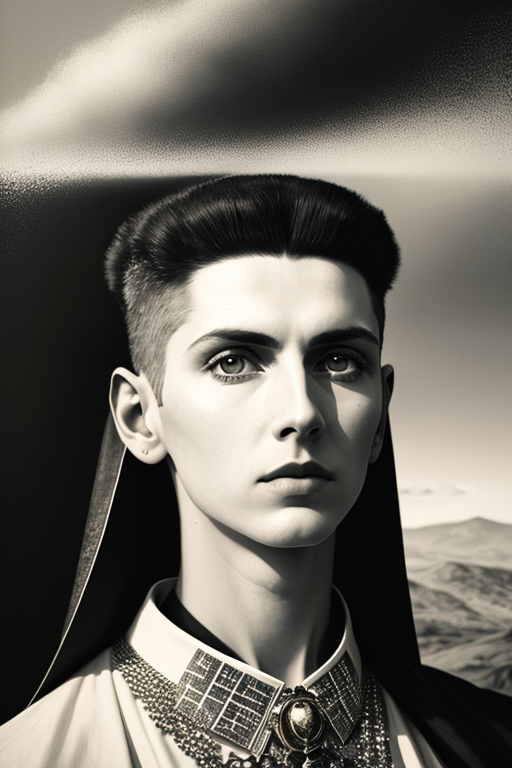

Alain Laboile [269047]


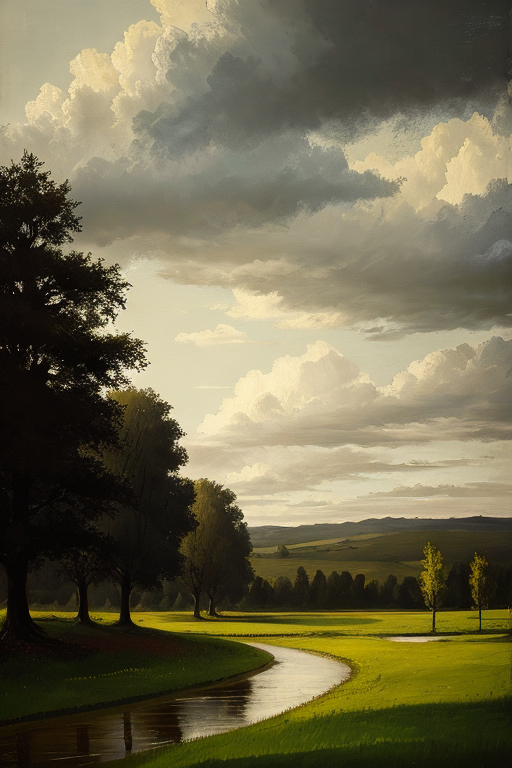

Go Nagai [269047]


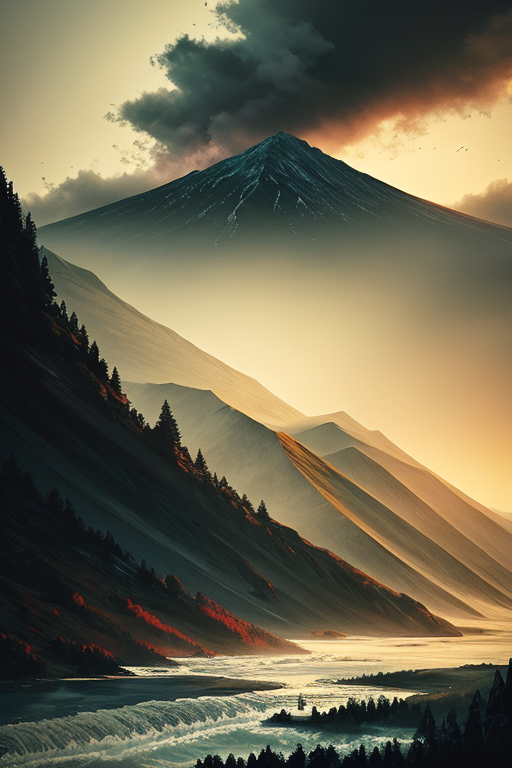

In [14]:
from random import randint
import webuiapi
from PIL import Image

def load_artists(amount=5, ignore=None) -> [str]:
    """
    Loads artists from artists.txt (up to 1840)
    :param amount: Amount of random artist to take from artists.txt
    :param ignore: List of ignored names
    :return: List of names
    """
    if ignore is None:
        ignore = ()
    alist = []
    c = 0
    with open('artists.txt', encoding='utf-8') as a:
        alines = a.readlines()
        while c < amount or not len(alines):
            _aname = alines.pop(randint(0, len(alines))).strip().split(',', 1)[0]
            if _aname not in ignore:
                alist.append(_aname)
                c += 1
    del alines
    return alist


api = webuiapi.WebUIApi(sampler='DPM++ 2M', steps=25)
# * %st1% will be replaced with artist name
promt = '''(landscape:0.9), (by Olly Moss, in style of %st1%:1.1),
cinematic, best quality, moody, impasto,
volumetric lighting, detailed, intricate, detailed face, 85mm,
        '''
negs = '''(deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, (mutated hands and fingers:1.4), disconnected limbs, mutation, mutated, ugly, disgusting, blurry, amputation, cartoony, easynegative'''
# * You can manually enter artists names aswell. You can find them at seedscienceai.com i.e.
# styles = ('carrie ann baade', 'frederic leighton', 'cai guo-qiang')
# * Put artists you already use in ignore list
styles = load_artists(amount=6, ignore=['Ellen jewett'])
print('Artists picked:', ', '.join(styles))

rseed = randint(0,1000000)

for style in styles:
    _p = promt.replace('%st1%', style)
    r = api.txt2img(
        prompt=_p,
        negative_prompt=negs,
        width=512,
        seed=rseed,
        height=768,
        steps=25,
        cfg_scale=6,
    )
    print(style, f'[{rseed}]')
    display(r.image)
    # downscale
    # twidth = 256
    # wpercent = (twidth/float(r.image.size[0]))
    # theight = int(r.image.size[1]*wpercent)
    # img = r.image.resize((twidth, theight), Image.LANCZOS)
    # display(img)